**Andrew Welling**

Spring 2025

CS 252: Mathematical Data Analysis and Visualization

Project 2: Linear regression

#### Week 2: QR-based linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 4: A QR-based linear regression solver

This task focuses on the implementation of a least squares solver that relies on the QR decomposition of the A matrix.


1. Write algorithm to compute QR decomposition (`linear_regression::qr_decomposition`). **Run test code below.** Equation for R: $$R = Q^TA$$
2. Implement `linear_regression::linear_regression_qr` to use the QR decomposition to do the linear regression. Recall that the equation is $$Rc = Q^Ty$$ which can be solved without taking the inverse of $R$ through backsolving.

#### Test QR decomposition

In [2]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)

A = iris_data.select_data(['sepal_length', 'petal_width'])
A1 = np.hstack([np.ones([len(A), 1]), A])

lin_reg_qr = linear_regression.LinearRegression(iris_data)
myQ, myR = lin_reg_qr.qr_decomposition(A1)

Q, R = np.linalg.qr(A1)

print(f'Your Q shape is {myQ.shape} and should be {Q.shape}')
print(f'Your R shape is {myR.shape} and should be {R.shape}')
print(f'1st few rows of your Q are\n{myQ[:3]} and should be\n{Q[:3]}')
print('NOTE: It is fine if your Q numbers match in absolute value\nbut 1 or more COLUMNS are negated.')
print(f'\nYour R is\n{myR} and should be\n{R}')
print('NOTE: It is fine if your R numbers match in absolute value\nbut 1 or more ROWS are negated.\n')

Your Q shape is (150, 3) and should be (150, 3)
Your R shape is (3, 3) and should be (3, 3)
1st few rows of your Q are
[[ 0.08165 -0.07354 -0.08214]
 [ 0.08165 -0.09333 -0.05401]
 [ 0.08165 -0.11311 -0.02587]] and should be
[[-0.08165 -0.07354 -0.08214]
 [-0.08165 -0.09333 -0.05401]
 [-0.08165 -0.11311 -0.02587]]
NOTE: It is fine if your Q numbers match in absolute value
but 1 or more COLUMNS are negated.

Your R is
[[12.24745 71.56593 14.68877]
 [ 0.      10.10784  7.61037]
 [-0.      -0.       5.35278]] and should be
[[-12.24745 -71.56593 -14.68877]
 [  0.       10.10784   7.61037]
 [  0.        0.        5.35278]]
NOTE: It is fine if your R numbers match in absolute value
but 1 or more ROWS are negated.



#### Test linear regression via QR decomposition

If everything is working as expected, you should reproduce the same plot that you obtained for the SciPy and Normal Equations solvers.

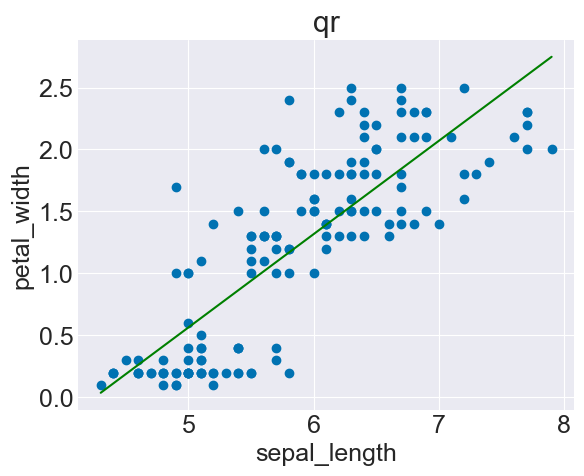

In [3]:
lin_reg_qr.linear_regression(['sepal_length'], 'petal_width', 'qr')
lin_reg_qr.scatter('sepal_length', 'petal_width', 'qr')
lin_reg_qr.show()

## Task 5: Benchmarking the least squares solvers on the wave dataset

You have added support for 3 least squares solver methods in `LinearRegression` — SciPy, Normal Equations, QR. Let's compare their stability on the wave dataset!

In the cell below, copy-and-paste your code that loads in the `wave_fit.csv`.

In [4]:
poly_data_filename = 'data/wave_fit.csv'
poly_data = data.Data(poly_data_filename)
print(poly_data)

data/wave_fit.csv (150x2)
Headers:
x  y
----------------------------------------
Showing first 5/150 rows
2.0858  -0.4942
4.6724  -5.85
2.4812  -3.3264
0.2579  4.5996
-0.9518  4.9771



### 5a. Varying the model polynomial degree

In the cell below, create a single plot with 3 curves — the $R^2$ obtained on the wave dataset fit set when separate polynomial regressions are fit to the wave fit set with polynomial degrees `1`, `2`, `3`, `...` with each of the 3 least square solver methods.

- The x axis should show the model polynomial degree.
- The y axis should show the fit set $R^2$.
- The legend should indicate which solver corresponds to which colored curve.

Create 3 separate versions of the plot below (*have the below cell show all 3*):
1. the polynomial degree goes to 20.
2. the polynomial degree goes to 25.
3. the polynomial degree goes to 100.

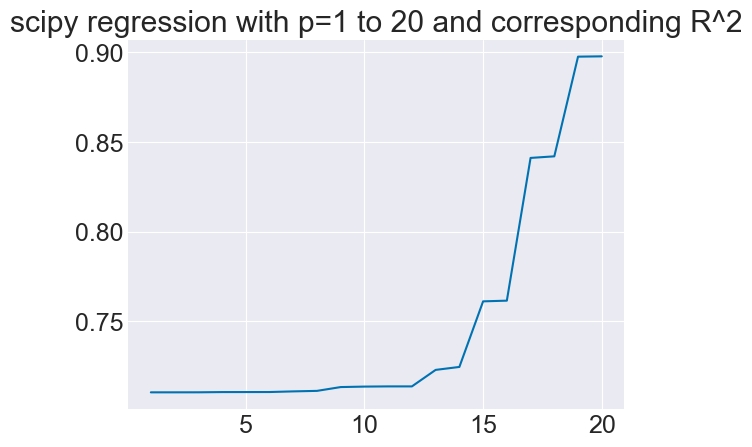

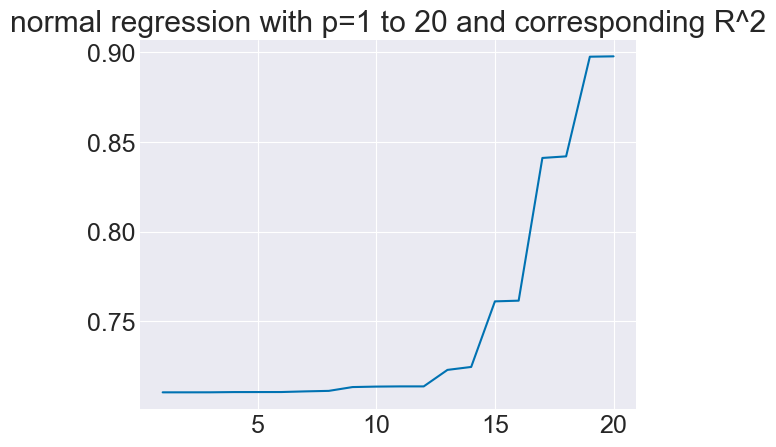

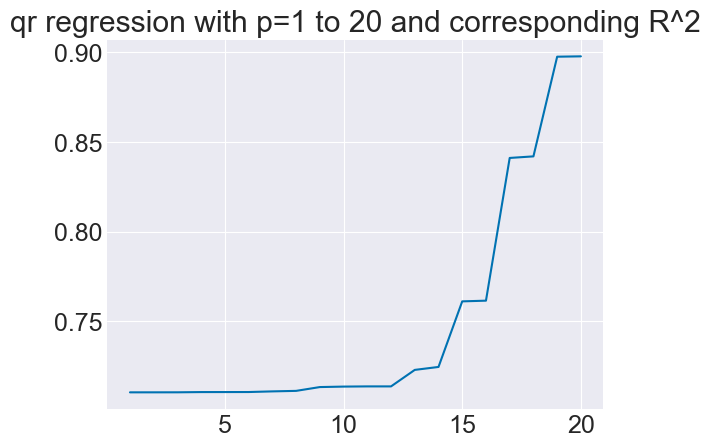

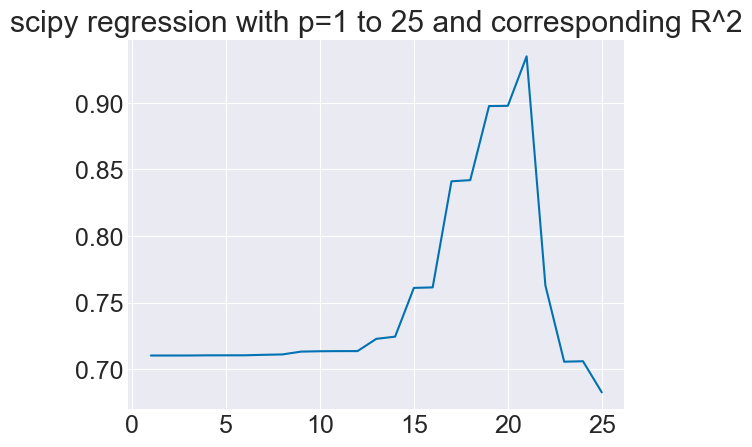

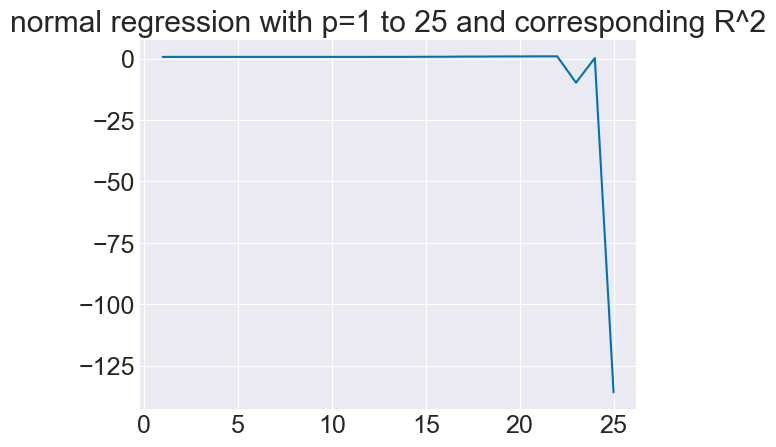

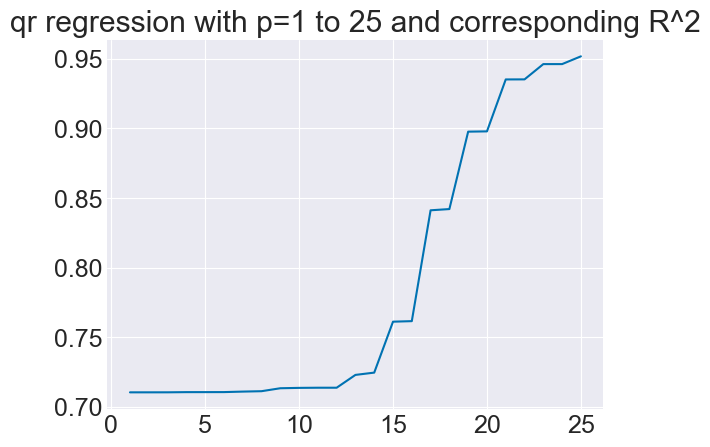

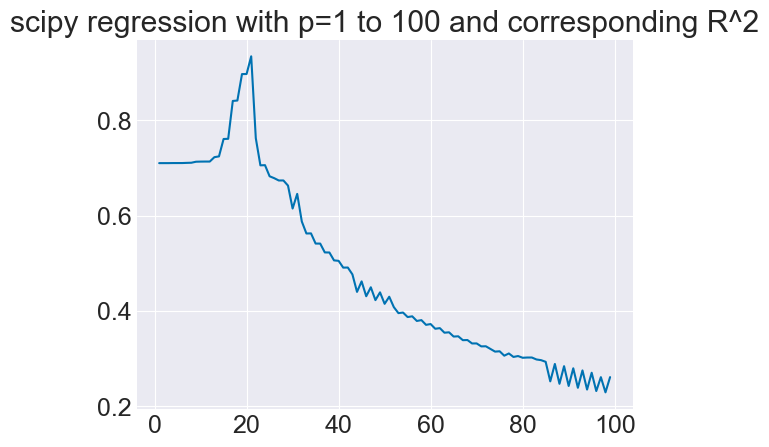

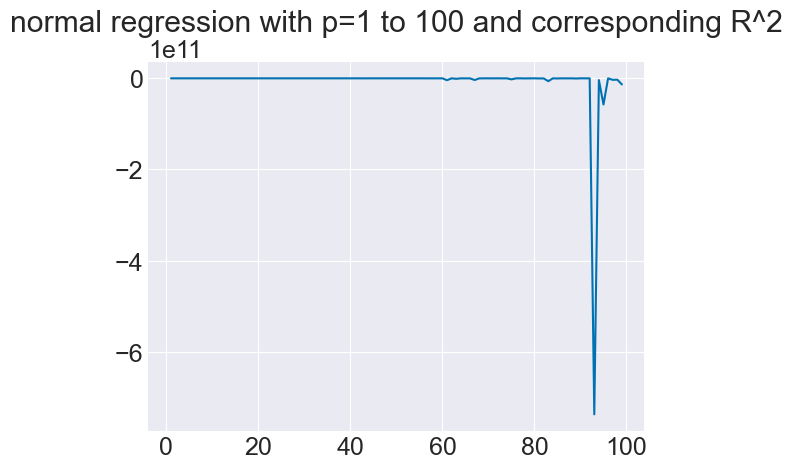

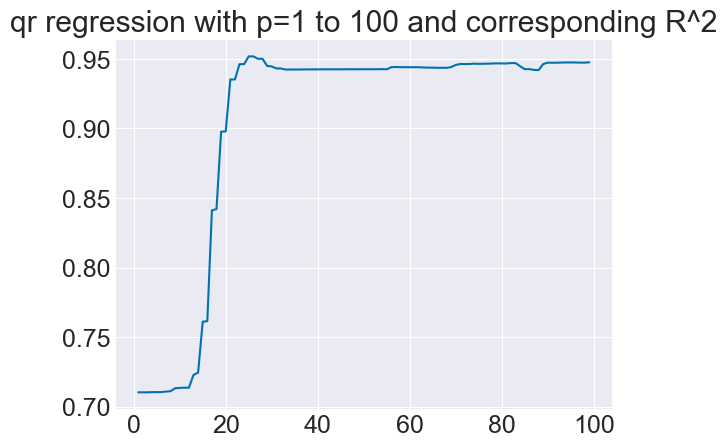

In [5]:
# calculate regressions
methods = ['scipy', 'normal', 'qr']
R2_list = [] # will be 2d list by method (row) and R2 values per p (cols)
lin_reg = linear_regression.LinearRegression(poly_data)

for method in methods:
    method_R2 = []
    for p in range(1,100):
        lin_reg.poly_regression('x','y',p,method=method)
        method_R2.append(lin_reg.R2)
    R2_list.append(method_R2)

# show vals
p_arr = np.arange(1, 100)
p_list = [20,25,100]
for p_max in p_list:
    for i in range(len(methods)):
        plt.plot(p_arr[:p_max],R2_list[i][:p_max])
        plt.title(f"{methods[i]} regression with p=1 to {p_max} and corresponding R^2")
        plt.show()

### 5b. Visualizing differences among solvers when fitting high degree polynomials

Create 3 plots that show the model fit/predictions on the fit set when the polynomial degree is 3 larger than the point at which the solvers start to show departures in their $R^2$ values.

*It should be helpful/quick to copy-paste and modify your plotting code from the polynomial regression notebook.*

MSE: 4.467608462169383


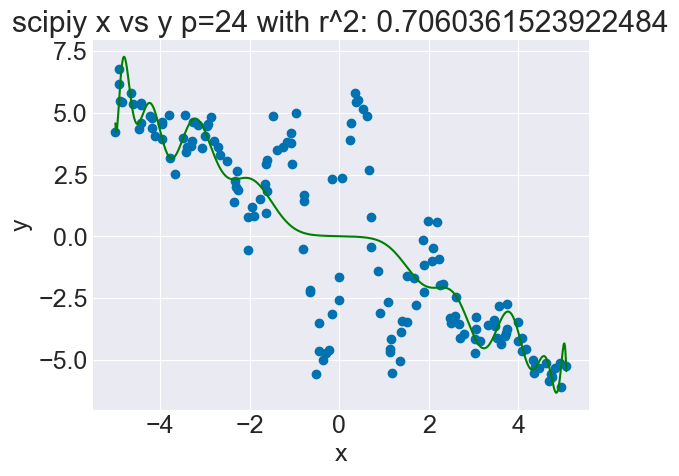

MSE: 11.612868318794813


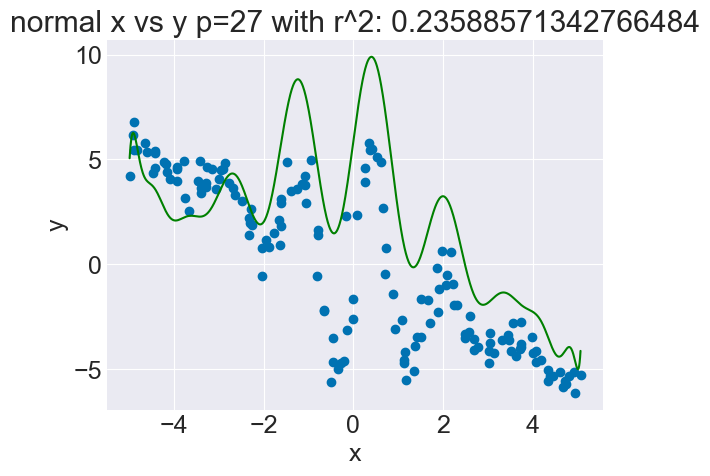

MSE: 0.8188537356033947


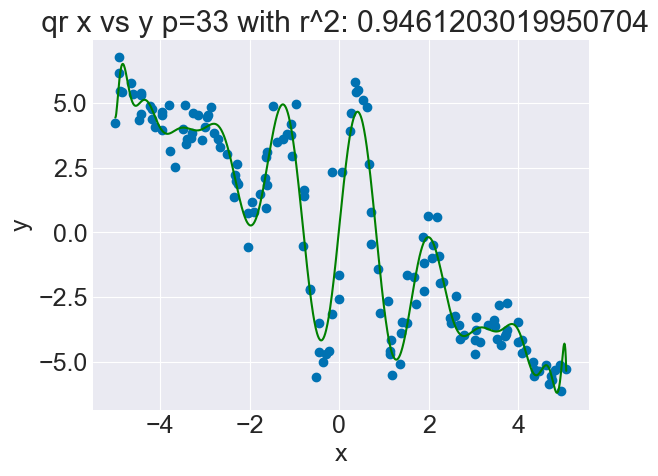

In [6]:
lin_reg = linear_regression.LinearRegression(poly_data)
# departures occur around p=24, so that will be our fixed p value
lin_reg.poly_regression("x","y",method="scipy",p=24)
lin_reg.scatter("x","y", f"scipiy x vs y p=24 with r^2: {lin_reg.R2}")
print(f"MSE: {lin_reg.mse}")

plt.show()


lin_reg.poly_regression("x","y",method="normal",p=24)
lin_reg.scatter("x","y", f"normal x vs y p=27 with r^2: {lin_reg.R2}")
print(f"MSE: {lin_reg.mse}")

plt.show()

lin_reg.poly_regression("x","y",method="qr",p=24)
lin_reg.scatter("x","y", f" qr x vs y p=33 with r^2: {lin_reg.R2}")
print(f"MSE: {lin_reg.mse}")

plt.show()


### 5c. Questions

**Question 8:** Which solver most closely exhibits results that match our expectations for high $p$ values. 

**Question 9:** Based on your analysis above, what is your overall ranking of the best solvers, from most to least stable? Provide specific evidence from your results to support your ordering.

**Question 10:** Based on your plots in the previous subtask (with fixed $p$, one plot per solver), which among the that did not perform the best demonstrated the most resilience/graceful failure under the challenging computational conditions?

**Question 11:** What surprised you about the results that you obtained?

**Answer 8:** 

The QR solver matches these expectations, as its more numerically stable than the rest of the regression methods. It's also the only method that displays relatively consistent performance at higher p values, which should be expected.

**Answer 9:**

QR is the best solver. It performs the most consistently among all p values experimented with, as the R^2 value continues to rise as expected at higher polynomial degrees. Scipy is the second best solver, as it remains relatively stable and even appears to balance itself out when it begins to experience instability. This is displayed by the bouncing between 2 similar values past p=80, though it does tend to experience a departure in expected performance after the p=20 mark. I'd argue that normal is the worst of the 3, as it starts to experience significant issues past p=20 (first shown by the drop to negative values of R^2 around p=22-23). Even the scatter plot with its regression modelled above is very far off from the actual data points.

**Answer 10:** 

Normal equations did not perform well at all at this fixed p value. It started to detract from the data, with the polynomial regression going significantly above the data points. It also had a very high MSE of 11, where as the others remained below 5. QR began to stabilize itself as it failed, but the normal equations continued to get even worse and resulted in unexpected behaviour.

**Answer 11:** 

I was most surprised by how badly the normal equation model began to fail, as I expected it to function somewhat well at higher p values, but this was not true at all. The mean would've been a way better fit than higher polynomial regressions would be.

## Task 6: Compare performance of the linear regression methods on brain data

The brain dataset contains electrical [EEG](https://en.wikipedia.org/wiki/Electroencephalography) measurements from different locations on the scalp of the human head.

### 6a. Run linear regressions on brain data with different solvers

1. In the cell below, load in the brain network `brain.csv` dataset.
2. Create `Data` and `LinearRegression` objects.
3. Load in the list of variable names in the brain dataset (62)
4. Do multiple linear regressions, separately for each of the 3 linear regression methods that you have implemented: Set all brain data variables except for the last one as the independent variables, the last variable is the dependent variable.
5. Compute and print the mean squared error (MSE) in the predictions made by each linear regression model and the actual y values.

In [7]:
brain_filename = 'data/brain.csv'
brain_data = data.Data(brain_filename)
lin_reg = linear_regression.LinearRegression(brain_data)
var_names = np.genfromtxt("data/brain_var_names.txt", delimiter=",",dtype=str)
# checking if everything loaded correctly
print(brain_data.data[0])
print(var_names)
ind_vars = var_names[:61]
dep_var = var_names[61]

[ 56.05574  92.03104   3.39158  38.65968  26.20382 -49.71557  47.46104
  26.74661 -35.89886  -1.88918   5.89869 -43.69232 -47.66426  12.28412
   1.56654 -13.04259  -1.85526 -39.8059  -30.83151 -61.13701 -25.82786
  39.02416 -29.97165  -6.13237 -56.75699   0.21014 -33.01984   2.97849
  -8.32731  15.07715 -10.35627  18.01882 -63.29214 -75.99512 -35.44592
 -99.39272 -73.01742 -18.96801  14.88084 -47.7546   14.73847 -16.85301
 -34.21782 -66.3307   -5.72331 -32.08143 -76.85455  13.46819  68.45629
  19.31101  30.17893  60.52641   0.6079  -70.27055  77.36578 -21.73455
   1.02825   7.79178  68.90372 -10.52087 120.49046 -39.68643]
['1' '1.1' '2' '2.1' '3' '3.1' '4' '4.1' '5' '5.1' '6' '6.1' '6.2' '6.3'
 '7' '7.1' '7.2' '7.3' '7.4' '7.5' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '9'
 '9.1' '10' '10.1' '11' '11.1' '12' '12.1' '12.2' '12.3' '12.4' '13'
 '13.1' '13.2' '13.3' '13.4' '13.5' '14' '14.1' '15' '15.1' '16' '16.1'
 '16.2' '16.3' '16.4' '16.5' '16.6' '16.7' '17' '17.1' '17.2' '17.3'
 '17.4' '17.5'

In [8]:
lin_reg = linear_regression.LinearRegression(brain_data)
ind_vars = ind_vars.tolist() # convert to regular python list
dep_var = dep_var
for m in methods:
    lin_reg.linear_regression(ind_vars,dep_var,method=m)
    print(f"{m} had an mse of {lin_reg.mse}")

scipy had an mse of 2.1093994995034434e-25
normal had an mse of 16280.406719928815
qr had an mse of 2.5376757495355275e-23


### 6b. Questions

**Question 12:** What are the mean squared errors for each of the regression methods on the brain data? Which method(s) do best and which do the worst **and why**?

**Answer 12:**

The normal regression model does the worst by far. It had an MSE of over 16,000 while the other models had extremely low decimal values. I believe the normal equation does the worst due to its poor numeric stability when it has to inverse the A matrix, as the matrix created by these values must have a very low kappa value due to the quantity of the brain data. Thus, the inversion will cause a lot of issues and be far off from the actual data. Scipy had performed the best, albeit just barely.